In [56]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import os
import geopandas as gpd
import geojson
import folium
import re
from IPython.display import IFrame
from ast import literal_eval

# FIRST NOTEBOOK

In [2]:
df_2017 = pd.read_excel('CP113B_Data_Redlining_Analysis_2017.xlsx')

# Scatter Plot

In [3]:
def f(a,b):
    # Polynomial males.
    df_2017_fit = np.polyfit(df_2017[a],df_2017[b],1)

    # Scatter plots.
    ax1= df_2017.plot(kind='scatter', x=a,y=b, color='blue',alpha=0.5, figsize=(12,8))

    # Regression lines.
    plt.plot(df_2017[a],df_2017_fit[0]*df_2017[a]+df_2017_fit[1], color='darkblue', linewidth=2)

    # Regression equations.
#     plt.text(65,23,'y={:.2f}+{:.2f}*x'.format(df_2017_fit[1],df_2017_fit[0]),color='darkblue')

    # Legend, title and labels.
    plt.legend(labels=['DF_2017'+'Regresion Line','DF_2017'])
    plt.title('Relationship between'+ a + 'and' + a, size=24)
    plt.xlabel(a, size=18)
    plt.ylabel(b, size=18);
display(widgets.interactive(f,a=df_2017.columns.tolist(),b=df_2017.columns.tolist()))

interactive(children=(Dropdown(description='a', options=('FIPS', 'Name of Area', 'Total Population', 'Percent …

# SECOND NOTEBOOK

In [4]:
#Open dataframe
df_2017 = pd.read_excel('CP113B_Data_Redlining_Analysis_2017.xlsx')
df_2017 = df_2017.rename(columns = {'High School Drop Out Rate':'Percent High School Dropouts'})
df_2017 = df_2017.rename(columns = {'Percent Other Race/Ethnicity':'Percent Other Race or Ethnicity'})
df_2017 = df_2017.rename(columns = {'Percent BA or Higher':'Percent with a BA Degree or Higher'})
df_2017.head(2)

,FIPS,Name of Area,Total Population,Percent Non-Hispanic White,Percent Black,Percent Hispanic,Percent Asian,Percent Other Race or Ethnicity,Poverty Rate,Percent with a BA Degree or Higher,Percent High School Dropouts,Median Household Income,Housing Units,Percent Owner Occupied,Median House Value
0,6001400100,"Census Tract 4001, Alameda County, California",2991,69.207623,2.808425,3.778001,16.181879,8.024072,4.225352,81.301824,0.0,208393,1254,88.038278,1104500.0
1,6001400200,"Census Tract 4002, Alameda County, California",1997,71.306960,0.901352,8.863295,9.814722,9.113671,5.469142,81.696429,0.0,147500,828,59.782609,1045200.0


In [5]:
df_2000 = pd.read_excel('CP113B_Data_Redlining_Analysis_2000.xlsx')
df_2000.head(2)

,FIPS,Name of Area,Total Population,Percent Non-Hispanic White,Percent Black,Percent Hispanic,Percent Asian,Percent Other Race or Ethnicity,Poverty Rate,Percent with a BA Degree or Higher,Percent High School Dropouts,Median Household Income,Housing Units,Percent Owner Occupied,Median House Value
0,6001400100,Census Tract 4001,2463,76.461039,4.951299,4.586039,11.201299,2.800325,2.925640,83.717509,0.0,196645,1145,90.567686,985548
1,6001400200,Census Tract 4002,1943,79.989712,2.572016,5.967078,7.047325,4.423868,6.841564,77.258567,0.0,122061,862,57.656613,677115


# Bar Plot

In [6]:
Variance_1 = widgets.Dropdown(
    options=df_2017.columns.tolist(),
    description='Variable:',
    disabled=False,
)
display(Variance_1)

Dropdown(description='Variable:', options=('FIPS', 'Name of Area', 'Total Population', 'Percent Non-Hispanic W…

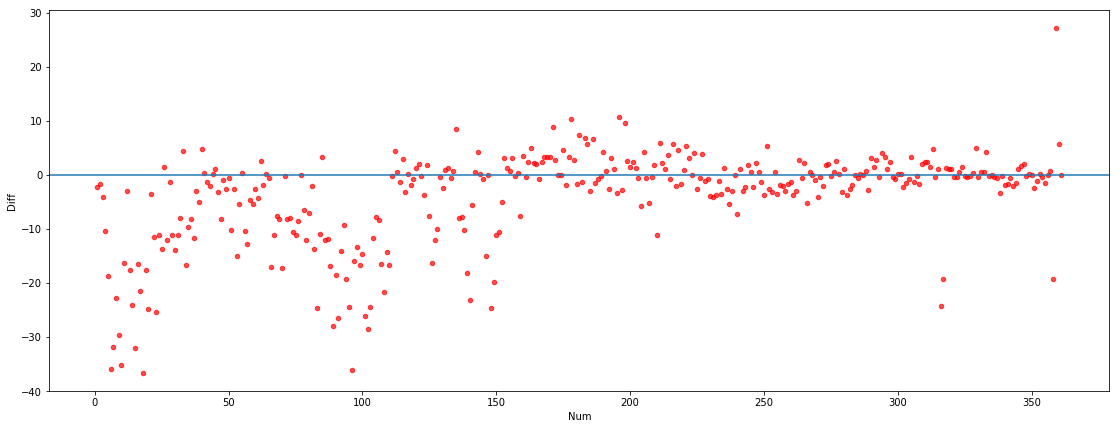

In [21]:
Diff_2017_2000 = df_2017[Variance_1.value].values-df_2000[Variance_1.value].values
Diff_df=pd.DataFrame(Diff_2017_2000, columns=['Diff']) 
Diff_df['Name of Area'] = df_2017['Name of Area']
Diff_df['Num'] = range(1,362)
ax=Diff_df.plot(kind='scatter', x="Num",y="Diff", color='red',alpha=.7, figsize=(19,7))
ax.axhline(y=0)

In [22]:
df_2017_graph = df_2017.copy()
df_2017_graph['Difference'] = Diff_2017_2000 
df_2017_graph

,FIPS,Name of Area,Total Population,Percent Non-Hispanic White,Percent Black,Percent Hispanic,Percent Asian,Percent Other Race or Ethnicity,Poverty Rate,Percent with a BA Degree or Higher,Percent High School Dropouts,Median Household Income,Housing Units,Percent Owner Occupied,Median House Value,Difference
0,6001400100,"Census Tract 4001, Alameda County, California",2991,69.207623,2.808425,3.778001,16.181879,8.024072,4.225352,81.301824,0.000000,208393,1254,88.038278,1104500.0,-2.142873
1,6001400200,"Census Tract 4002, Alameda County, California",1997,71.306960,0.901352,8.863295,9.814722,9.113671,5.469142,81.696429,0.000000,147500,828,59.782609,1045200.0,-1.670664
2,6001400300,"Census Tract 4003, Alameda County, California",5123,66.972477,9.408550,7.515128,9.759906,6.343939,7.510814,66.311618,0.000000,88173,2458,43.653377,943300.0,-4.099757
3,6001400400,"Census Tract 4004, Alameda County, California",3991,65.772989,5.963418,9.446254,12.127286,6.690053,9.248555,80.101394,0.000000,102821,1786,36.674132,872400.0,-10.379845
4,6001400500,"Census Tract 4005, Alameda County, California",3944,53.372211,24.112576,10.319473,5.578093,6.617647,9.421951,67.216425,0.000000,92375,1625,35.815385,721700.0,-18.610704
5,6001400600,"Census Tract 4006, Alameda County, California",1635,44.587156,24.587156,8.562691,9.663609,12.599388,10.948012,65.539452,0.000000,86458,691,48.335745,615000.0,-35.929883
6,6001400700,"Census Tract 4007, Alameda County, California",4837,37.543932,34.711598,17.717594,4.134794,5.892082,15.958549,42.083114,0.000000,55066,1849,38.831801,648900.0,-31.835245
7,6001400800,"Census Tract 4008, Alameda County, California",3796,38.382508,32.060063,11.090622,13.198103,5.268704,12.062984,48.908008,0.000000,64788,1593,37.539234,581300.0,-22.736492
8,6001400900,"Census Tract 4009, Alameda County, California",2394,42.564745,32.372598,12.071846,6.140351,6.850459,15.250637,45.030539,37.142857,57011,1050,33.428571,586600.0,-29.532164
9,6001401000,"Census Tract 4010, Alameda County, California",6247,29.278053,36.593565,19.801505,2.977429,11.349448,24.907838,31.437458,0.000000,60443,2490,33.453815,466300.0,-35.152800


In [46]:
alameda = geojson.load(open("alameda-2010.geojson"))
df_alameda = pd.DataFrame(data=alameda)
test = df_alameda['features'][0]
census_tracts_df = []
for feature in df_2017_graph['Name of Area']:
    census_tracts_df.append(re.findall(r'(Census Tract \d*)', str(feature))[0])
df_2017_graph['Name of Area'] =census_tracts_df
df_2017_graph['FIPS_str'] = df_2017_graph.FIPS.apply(str)
df_2017_graph['Census Tract'] = [i[4:8] for i in df_2017_graph["FIPS_str"]]

In [29]:
#####positive --- gentrification happened##
#####negative --- gentrification did not happen

df_difference = df_2017_graph['Difference']

df_difference[df_difference < 0] = 0 
df_difference[df_difference > 0] = 1
df_2017_graph['Difference'] = df_difference

In [ ]:
def Map_area(a,b):
    # Polynomial males.
    df_2017_fit = np.polyfit(df_2017[a],df_2017[b],1)

    # Scatter plots.
    ax1= df_2017.plot(kind='scatter', x=a,y=b, color='blue',alpha=0.5, figsize=(12,8))

    # Regression lines.
    plt.plot(df_2017[a],df_2017_fit[0]*df_2017[a]+df_2017_fit[1], color='darkblue', linewidth=2)

    # Regression equations.
#     plt.text(65,23,'y={:.2f}+{:.2f}*x'.format(df_2017_fit[1],df_2017_fit[0]),color='darkblue')

    # Legend, title and labels.
    plt.legend(labels=['DF_2017'+'Regresion Line','DF_2017'])
    plt.title('Relationship between'+ a + 'and' + a, size=24)
    plt.xlabel(a, size=18)
    plt.ylabel(b, size=18);
display(widgets.interactive(f,a=df_2017.columns.tolist(),b=df_2017.columns.tolist()))

In [101]:
     # Subset the redlining data to keep only those with a bad grade (D)
oakland_d = oakland_gdf[oakland_gdf['holc_grade']=='D']
oakland_c = oakland_gdf[oakland_gdf['holc_grade']=='C']
oakland_b = oakland_gdf[oakland_gdf['holc_grade']=='B']
oakland_a = oakland_gdf[oakland_gdf['holc_grade']=='A']

dir = os.path.join("maps_")
if not os.path.exists(dir):os.mkdir(dir)
oakland_gdf= gpd.read_file("CAOakland1937.geojson")
oakland_gdf.head()

map7 = folium.Map(location=(37.8044, -122.2711), zoom_start=12.4)
folium.Choropleth(geo_data=alameda, 
             name='Difference', 
             data=df_2017_graph,
             columns=['Census Tract', 'Difference'],
             key_on='feature.properties.name10',  
             fill_color='YlOrRd', 
             fill_opacity=.5, 
             line_opacity=1,         
             nan_fill_opacity = 0,
             legend_name="Poverty Rate"
            ).add_to(map7)

#add redline data
map7.choropleth(oakland_d, fill_color='blue', fill_opacity=0.25)

map7.save("maps_/map7.html")
IFrame('maps_/map7.html', width=800, height=800)

In [88]:
Oakland_dict['oakland_a']

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A,A,{'': ''},"(POLYGON ((-122.202522 37.810986, -122.202308 ..."
1,None,A1,A,"{'1': 'Berkeley Green A-1', '2': 'Characterize...","(POLYGON ((-122.263194 37.900395, -122.261827 ..."
2,None,A10,A,"{'1': 'Oakland, California Low Green A-10', '2...","(POLYGON ((-122.23403 37.80671, -122.234358 37..."
3,None,A11,A,"{'1': 'Oakland, California Green A-11', '2': '...","(POLYGON ((-122.202522 37.810986, -122.203372 ..."
4,None,A2,A,"{'1': 'Berkeley, California Green A-2', '2': '...","(POLYGON ((-122.278471 37.897102, -122.278515 ..."
5,None,A3,A,"{'1': 'Berkeley, California Low Green A-3', '2...","(POLYGON ((-122.263112 37.885552, -122.262755 ..."
6,None,A4,A,"{'1': 'Berkeley, California High Green A-4', '...","(POLYGON ((-122.242129 37.851817, -122.247063 ..."
7,None,A5,A,"{'1': 'Oakland High Green A-5', '2': 'Characte...","(POLYGON ((-122.238103 37.841486, -122.238894 ..."
8,None,A6,A,"{'1': 'Oakland, California Green A-6', '2': 'R...","(POLYGON ((-122.215604 37.831926, -122.214216 ..."
9,None,A7,A,"{'1': 'Piedmont, California High Green A-7', '...","(POLYGON ((-122.224606 37.830472, -122.220976 ..."


In [74]:
area=list(Oakland_dict.values())
area

[    name holc_id holc_grade  \
 0   None       A          A   
 1   None      A1          A   
 2   None     A10          A   
 3   None     A11          A   
 4   None      A2          A   
 5   None      A3          A   
 6   None      A4          A   
 7   None      A5          A   
 8   None      A6          A   
 9   None      A7          A   
 10  None      A8          A   
 11  None      A9          A   
 
                                 area_description_data  \
 0                                            {'': ''}   
 1   {'1': 'Berkeley Green A-1', '2': 'Characterize...   
 2   {'1': 'Oakland, California Low Green A-10', '2...   
 3   {'1': 'Oakland, California Green A-11', '2': '...   
 4   {'1': 'Berkeley, California Green A-2', '2': '...   
 5   {'1': 'Berkeley, California Low Green A-3', '2...   
 6   {'1': 'Berkeley, California High Green A-4', '...   
 7   {'1': 'Oakland High Green A-5', '2': 'Characte...   
 8   {'1': 'Oakland, California Green A-6', '2': 'R...   
 9

# Scatter Plot

In [ ]:
def f(X,Y):
    # Polynomial males.
    df_2017_fit = np.polyfit(df_2017[X],df_2017[Y],1)

    # Polynomial females.
    df_2000_fit = np.polyfit(df_2000[X],df_2000[Y],1)


    # Scatter plots.
    ax1= df_2017.plot(kind='scatter', x=X,y=Y, color='blue',alpha=0.5, figsize=(12,8))
    df_2000.plot(kind='scatter', x=X,y=Y, color='magenta',alpha=0.5, figsize=(12,8),ax=ax1)

    # Regression lines.
    plt.plot(df_2017[X],df_2017_fit[0]*df_2017[X]+df_2017_fit[1], color='darkblue', linewidth=2)
    plt.plot(df_2000[X],df_2000_fit[0]*df_2000[X]+df_2000_fit[1], color='deeppink', linewidth=2)

    # Regression equations.
    #plt.text(5,5,'y={:.2f}+{:.2f}*x'.format(df_2017_fit[1],df_2017_fit[0]),color='darkblue')
#     plt.text(65,23,'y={:.2f}+{:.2f}*x'.format(df_2000_fit[1],df_2000_fit[0]),color='deeppink')

    # Legend, title and labels.
    plt.legend(labels=['DF_2017'+'Regresion Line','DF_2000'+'Regresion Line', 'DF_2017','DF_2000'])
    plt.title('Relationship between'+ X + 'and' + Y, size=24)
    plt.xlabel(X, size=18)
    plt.ylabel(Y, size=18);
display(widgets.interactive(f,X=df_2017.columns.tolist(),Y=df_2017.columns.tolist()))